In [ ]:
'''
【课程1.3】  数据归一化/标准化

 数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。
 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权
 
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

0-1标准化 / Z-score标准化

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 数据归一化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数(min=0, max=1)进行数据的归一化处理
# x1 = (x-min) / (max - min)  x = x1 * (1-0) + 0

# 创建数据
df = pd.DataFrame({'value1': np.random.rand(10) * 20,
                  'value2': np.random.rand(10) * 100})
print(df.head())
print('-' * 88)

def data_norm(data, *cols):
    """定义归一化方法"""
    data_c = data.copy()
    for col in cols:
        data_c[col + '_norm'] = ((data[col] - data[col].min()) / (data[col].max() - data[col].min())) * (1-0) + 0
    return data_c
    
# 对数据进行归一化
df_norm = data_norm(df, 'value1', 'value2')
print(df_norm.head())

      value1     value2
0   2.489235  91.852238
1  11.613377  18.116014
2  16.089268  79.555095
3  13.976375  83.676973
4   0.788001  53.277540
----------------------------------------------------------------------------------------
      value1     value2  value1_norm  value2_norm
0   2.489235  91.852238     0.121025     1.000000
1  11.613377  18.116014     0.647941     0.023929
2  16.089268  79.555095     0.906422     0.837219
3  13.976375  83.676973     0.784403     0.891781
4   0.788001  53.277540     0.022779     0.489374


In [7]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({
    'value1': np.random.rand(10) * 100,
    'value2': np.random.rand(10) * 100
})
print(df.head())
print('-' * 88)

def data_znorm(data, *cols):
    """数据标准化"""
    data_c = data.copy()
    for col in cols:
        # 计算平均值
        mean = data_c[col].mean()
        # 计算标准差
        std = data_c[col].std()
        # 计算Zscore
        data_c[col + '_zcore'] = (data_c[col] - mean) / std
    return data_c

# 对数据进行标准化
data_z = data_znorm(df, 'value1', 'value2')
print(data_z.head())

# 经过标准化的数据符合标准正太分布，均值为0，标准差为1
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，z-score表现良好

      value1     value2
0  83.293320  61.181598
1  20.053564  69.796289
2  11.217143  18.897966
3  52.698953  27.697346
4  24.293995   5.714165
----------------------------------------------------------------------------------------
      value1     value2  value1_zcore  value2_zcore
0  83.293320  61.181598      1.278215      0.354038
1  20.053564  69.796289     -0.657160      0.597014
2  11.217143  18.897966     -0.927587     -0.838565
3  52.698953  27.697346      0.341912     -0.590380
4  24.293995   5.714165     -0.527386     -1.210411


      value1     value2
A  17.941900  70.026473
B  12.235642  84.607177
C   2.265442  84.200399
D  24.078847  33.619864
E  13.739359  98.727461
F  16.950514   8.805950
G   1.157746   3.882645
H   6.945295  51.243272
I   7.034646  83.912128
J   8.796862  49.474450
----------------------------------------------------------------------------------------


,value1,value2,value1_zcore,value2_zcore,f
D,24.078847,33.619864,1.786898,-0.699798,0.792220
A,17.941900,70.026473,0.941024,0.396936,0.723389
E,13.739359,98.727461,0.361775,1.261542,0.721682
B,12.235642,84.607177,0.154513,0.836174,0.427178
I,7.034646,83.912128,-0.562356,0.815236,-0.011319
F,16.950514,8.805950,0.804378,-1.447307,-0.096296
J,8.796862,49.474450,-0.319464,-0.222185,-0.280553
C,2.265442,84.200399,-1.219710,0.823920,-0.402258
H,6.945295,51.243272,-0.574672,-0.168900,-0.412363
G,1.157746,3.882645,-1.372387,-1.595620,-1.461680


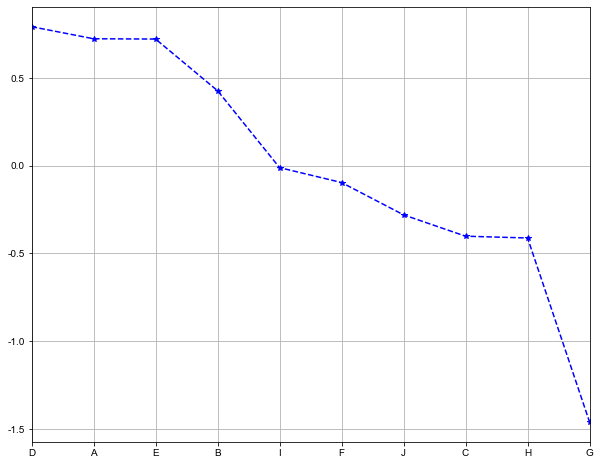

In [14]:
# 案例应用
# 八类产品的两个指标value1,value2,其中value1权重为0.6，value2的权重为0.4
# 通过标准化，判断哪个产品综合指标状况良好

df = pd.DataFrame({'value1': np.random.rand(10)*30,
                  'value2': np.random.rand(10)* 100}, index=list('ABCDEFGHIJ'))
print(df)
print('-' * 88)
# 创建数据

data = data_znorm(df, 'value1', 'value2')
data['f'] = data['value1_zcore'] * 0.6 + data['value2_zcore'] * 0.4
data.sort_values('f', inplace=True, ascending=False)
# 做折线图
data['f'].plot(kind='line', style='--b*', grid=True, figsize=(10, 8))
data